# Image Classification with CNN
The idea of this model is to class the animals into their own species based in a few features  

### Load Dataset and Import First Libraries

In [1]:
#import nvidia.cudnn
%pip install seaborn
import numpy as np
from data_organizer import organize_data
from get_DataSet import getData
from plot_data import plot_raw_data
from model_1 import model_1
from model_v2 import model_v2_build
from model_sofia import model_sofia
from model_sofia_augmented import model_sofia_augmented
from model_ahmad import build_model
from model_ahmad_f1 import build_model_f1
from model_resnet import model_resnet
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import mixed_precision
import torch
import tensorflow as tf
import gc
from numba import cuda  # optional if you have Numba installed


"""
Download dataset
"""
# Load CIFAR-10 dataset and split into training data and tests data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


2025-10-24 15:45:00.954502: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Setup GPU

In [2]:
# --- GPU safety setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# --- Mixed precision ---
#mixed_precision.set_global_policy('mixed_float16')

def free_gpu_memory():
    tf.keras.backend.clear_session()
    torch.cuda.empty_cache()
    gc.collect()



gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

'''
tf.keras.backend.clear_session()
gc.collect()
try:
    cuda.select_device(0)
    cuda.close()
except:
    pass
'''

'\ntf.keras.backend.clear_session()\ngc.collect()\ntry:\n    cuda.select_device(0)\n    cuda.close()\nexcept:\n    pass\n'

### Normalize Data / Clean up (Filter Animal classes)

x_train_filtered shape: (30000, 32, 32, 3)
y_train_filtered shape: (30000, 6)
x_test_filtered shape: (6000, 32, 32, 3)
y_test_filtered shape: (6000, 6)
Original shapes:
x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)
✅ Channel-last Format erkannt


I0000 00:00:1761313510.215116  241580 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6073 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


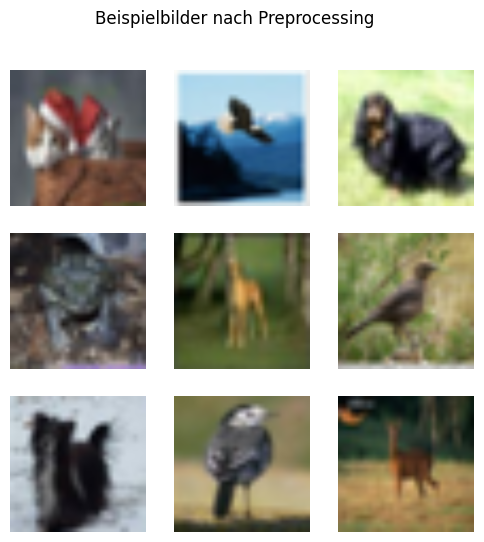

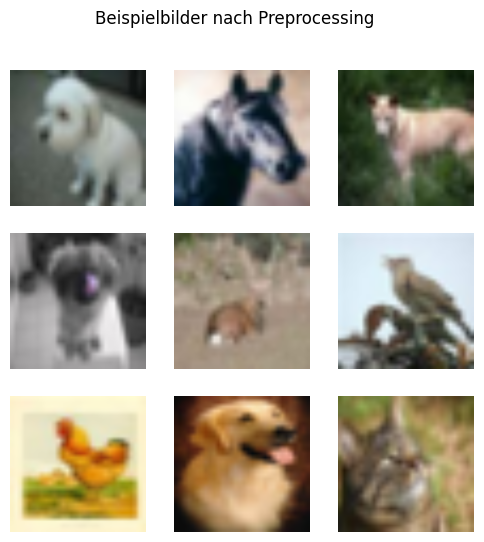

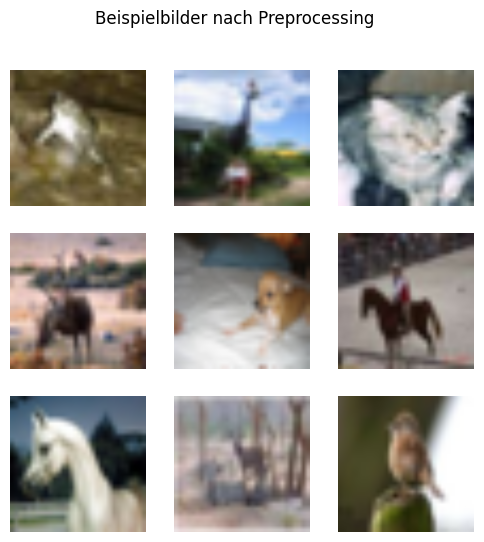

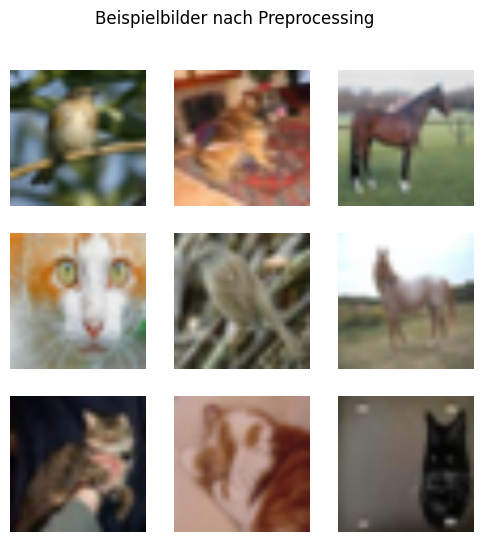

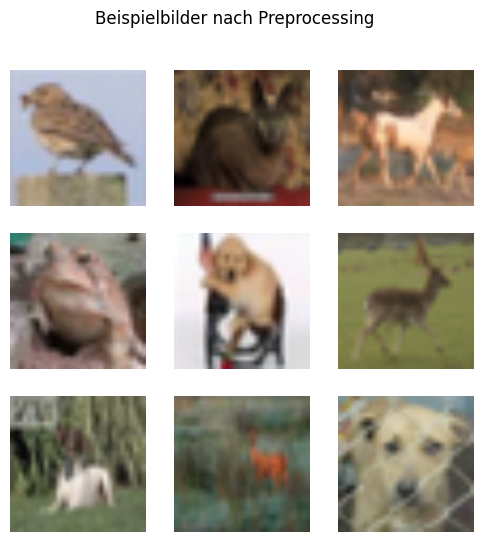

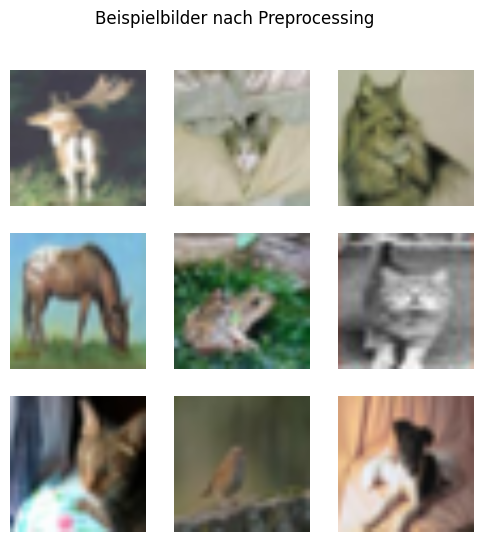

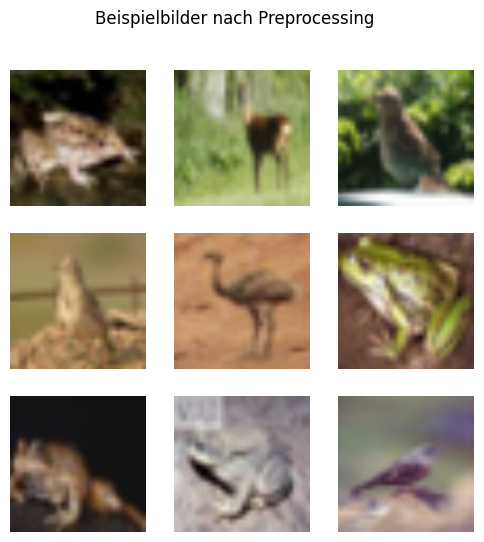

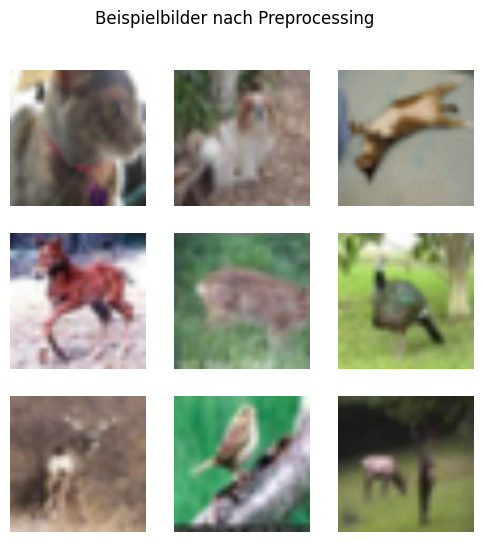

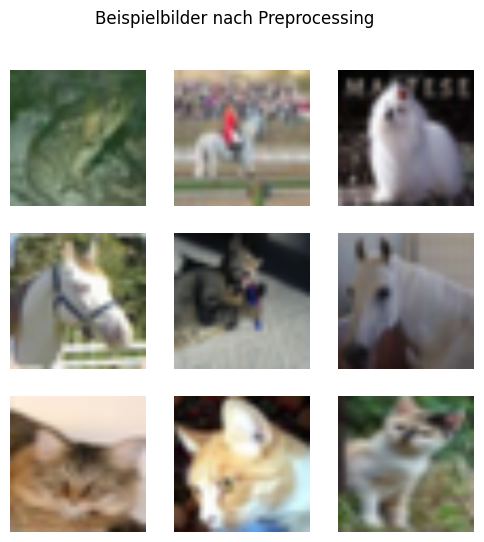

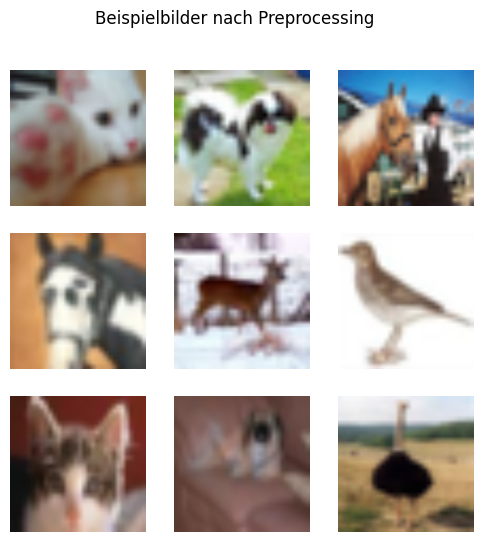

2025-10-24 15:45:13.754365: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


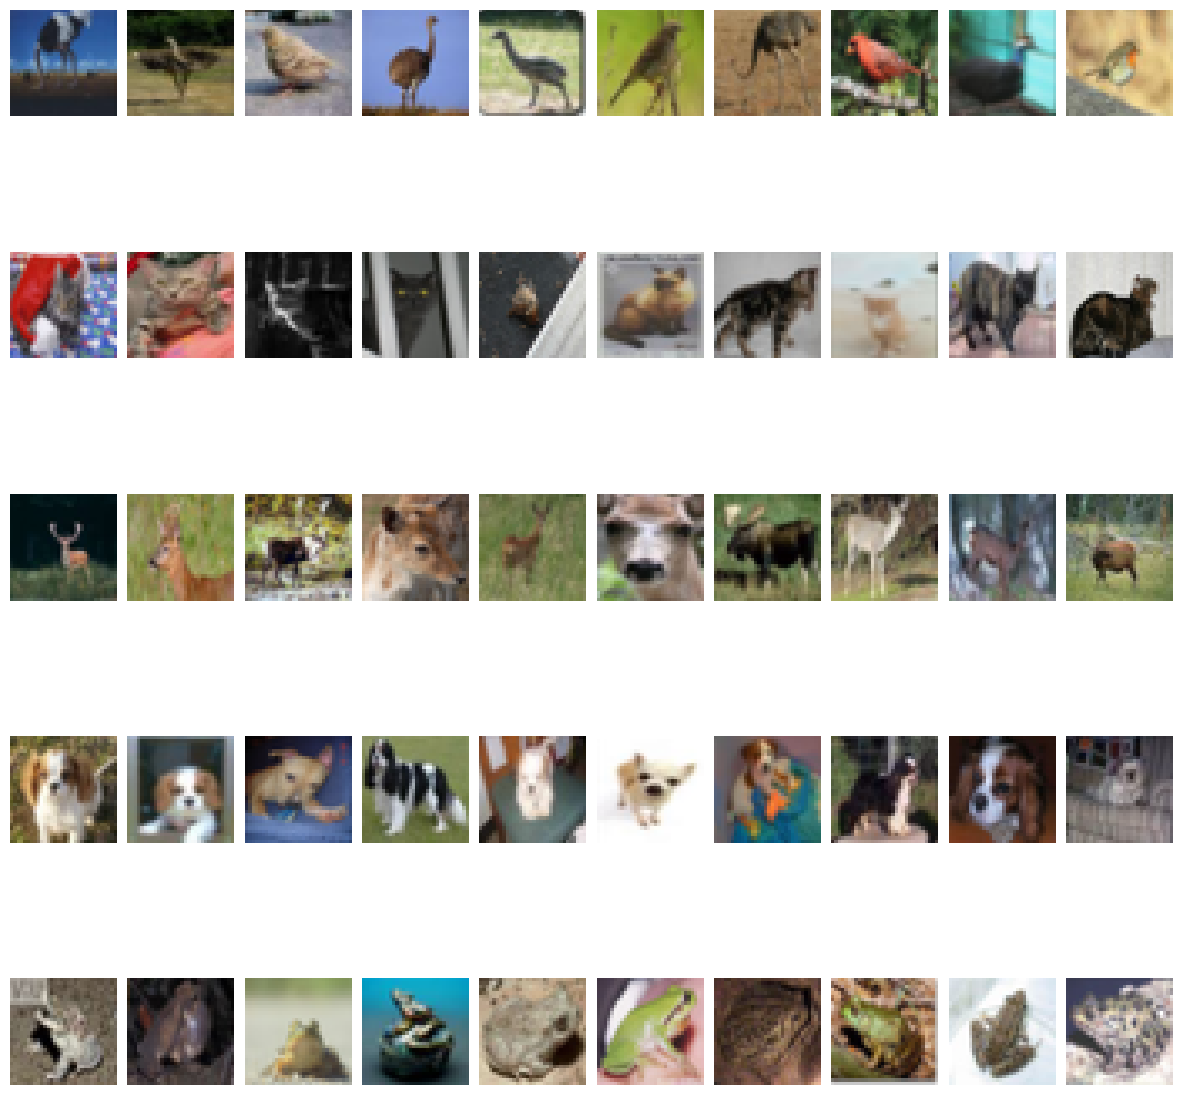

In [3]:
# Animal classes in CIFAR-10: 2 (bird), 3 (cat), 4 (deer), 5 (dog), 6 (frog), 7 (horse)
animal_classes = [2, 3, 4, 5, 6, 7]
input_shape = (32, 32, 3)

x_train_animals, y_train_animals, x_test_animals, y_test_animals, x_train_plot, y_train_plot = organize_data(x_train, y_train, x_test, y_test, animal_classes)

# data for model_v2
free_gpu_memory()
train_dataset, test_dataset = getData() 

## Visualisize images
# read call lables
class_names = np.unique(y_train_plot)
plot_raw_data(class_names, x_train_plot, y_train_plot, 5, 10)



### Build Model And Train It

In [4]:
from keras.backend import clear_session
clear_session()

In [5]:
## models Georg
#model_1(x_train_animals, y_train_animals, x_test_animals, y_test_animals, input_shape)
model_resnet(x_train_animals, y_train_animals, x_test_animals, y_test_animals)
#model_v2_build(train_dataset, test_dataset)


## models Sofia
#model_sofia(x_train_animals, y_train_animals, x_test_animals, y_test_animals, input_shape)
#model_sofia_augmented(x_train, y_train, x_test, y_test, input_shape)


#build_model()
#build_model_f1()

Epoch 1/50


2025-10-24 15:45:19.976056: I external/local_xla/xla/service/service.cc:163] XLA service 0x717f8c0023e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-24 15:45:19.976110: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-10-24 15:45:20.097966: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-24 15:45:20.903355: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-10-24 15:45:21.799611: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[256,128,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,3,32,32]{3,2,1,0}, f32[128,3,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, cust

117/118 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.3173 - loss: 1.7899

2025-10-24 15:45:47.805749: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[48,128,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[48,3,32,32]{3,2,1,0}, f32[128,3,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-10-24 15:45:47.819183: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[48,128,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[48,128,32,32]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_targe

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.3179 - loss: 1.7882

2025-10-24 15:45:53.855442: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[112,128,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[112,3,32,32]{3,2,1,0}, f32[128,3,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-10-24 15:45:53.876313: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[112,128,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[112,128,32,32]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_t

118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 232ms/step - accuracy: 0.3848 - loss: 1.5898 - val_accuracy: 0.1723 - val_loss: 2.4417 - learning_rate: 0.0010
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.4986 - loss: 1.3307 - val_accuracy: 0.1667 - val_loss: 3.9221 - learning_rate: 0.0010
Epoch 3/50
107/118 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.5385 - loss: 1.2455

KeyboardInterrupt: 